In [103]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

In [104]:
train_df = pd.read_csv('Final_Train_Dataset.csv')
test_df = pd.read_csv('Final_Test_Dataset.csv')

In [105]:
train_df.shape

(19802, 9)

In [106]:
train_df.tail()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
19797,19797,12-18 yrs,NaN,"Director, Medical Coding Training",NaN,"Medical Coding, ICD - 10, US Healthcare, RCM, ...",Hyderabad,15to25,2245
19798,19798,0-3 yrs,NaN,Looking For Freshers WHO WANT To Work WITH US,NaN,"offline, online, part time, home base, work fr...","Mumbai, Bengaluru, Chennai, Hyderabad, Dehradu...",0to3,4966
19799,19799,8-13 yrs,Annuities Domain experience is mandatory;Work ...,PM- C#/ .Net ( Annuity/ Insurance Domain),NaN,"SQL Server, VB.NET, C#, .Net, C#.Net, Oracle S...",Hyderabad,15to25,4272
19800,19800,1-3 yrs,- By plugging into our market-leading global n...,Consultant - Internal Audit,NaN,"accounting, internal audit, auditing, risk adv...",Pune,10to15,1793
19801,19801,2-5 yrs,- 3-5 years experience with the end to end pro...,Unity 3D Developer - Mobile Games Development,NaN,"IOS, XCode, Apple, Version Control, Perforce, ...",Hyderabad,10to15,1349


In [107]:
train_df['salary'].value_counts()

10to15    4500
15to25    4125
6to10     3533
0to3      3245
3to6      2824
25to50    1575
Name: salary, dtype: int64

In [108]:
train_df[0:10]

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305
5,5,5-10 yrs,4.\tWillingness to travel;5.\tExperience in Te...,Senior Trainer- Academics,NaN,"academics, effective communication, teacher tr...",Noida,6to10,4428
6,6,13-15 yrs,- Experience in managing fraud analytics with ...,Associate Vice President - Fraud Analytics - S...,Analytics,"Fraud Analytics, People Management Skills, Tea...",Delhi NCR,25to50,1988
7,7,6-10 yrs,Qualified Chartered Accountant with 1-3 yrs of...,Manager - Internal Audit - CA - Big4,NaN,"Accounting, Internal Audit, Auditing, Enterpri...",Pune,6to10,1793
8,8,1-3 yrs,Proven experience as payroll executive or spec...,Payroll Executive,NaN,"esic, hr, bonus, pf, tds, payroll, superannuat...",Ahmedabad(Bodakdev),0to3,3398
9,9,2-6 yrs,Other activities as may be required over the p...,Required CA (manager Finance) for R&R Salons P...,NaN,"accounting standards, finance, auditing, finan...",Bengaluru(Kodihalli),15to25,3444


In [109]:
test_df.shape, train_df.shape

((6601, 7), (19802, 9))

In [110]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 7 columns):
experience              6601 non-null object
job_description         5079 non-null object
job_desig               6601 non-null object
job_type                1637 non-null object
key_skills              6601 non-null object
location                6601 non-null object
company_name_encoded    6601 non-null int64
dtypes: int64(1), object(6)
memory usage: 361.1+ KB


In [111]:
X_train = train_df.drop(columns=['Unnamed: 0','job_description','key_skills'])
X_train = X_train.fillna(value='')

In [112]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 6 columns):
experience              19802 non-null object
job_desig               19802 non-null object
job_type                19802 non-null object
location                19802 non-null object
salary                  19802 non-null object
company_name_encoded    19802 non-null int64
dtypes: int64(1), object(5)
memory usage: 928.3+ KB


In [113]:
labelenc = LabelEncoder()
X_train = X_train.apply(labelenc.fit_transform)

In [114]:
X_train[0:10]

,experience,job_desig,job_type,location,salary,company_name_encoded
0,105,9104,0,597,5,3687
1,19,4395,0,1412,1,458
2,107,3058,3,525,2,4195
3,113,1087,3,114,1,313
4,8,10385,0,811,4,1305
5,102,9583,0,1229,5,4428
6,42,1149,3,525,3,1988
7,108,6025,0,1301,5,1793
8,8,7236,0,11,0,3398
9,83,8076,0,180,2,3444


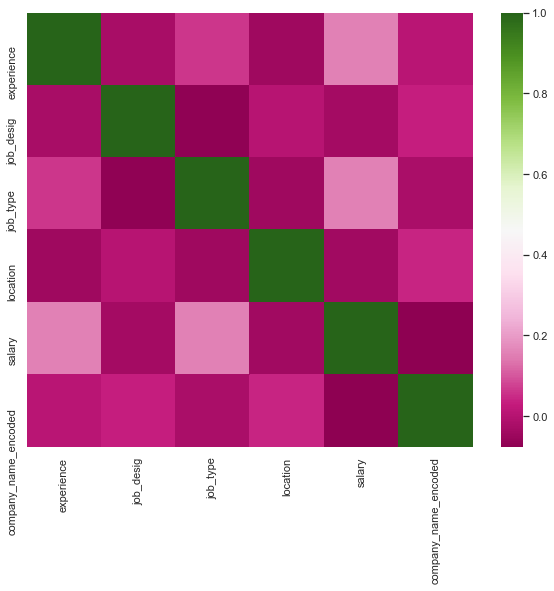

In [115]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), cmap="PiYG");

In [116]:
X_train['salary'].head()

0    5
1    1
2    2
3    1
4    4
Name: salary, dtype: int64

In [117]:
y_train = X_train['salary']

In [118]:
y_train.head()

0    5
1    1
2    2
3    1
4    4
Name: salary, dtype: int64

In [119]:
X_train = X_train.drop(columns=['salary'])

In [120]:
X_train_part, X_valid, y_train_part, y_valid = \
    train_test_split(X_train, y_train, 
                     test_size=0.3, random_state=17)

In [121]:
X_train.columns

Index(['experience', 'job_desig', 'job_type', 'location',
       'company_name_encoded'],
      dtype='object')

In [122]:
X_train_part.shape, y_train_part.shape, X_valid.shape

((13861, 5), (13861,), (5941, 5))

In [123]:
y_train_part.head()

994      3
5800     5
807      2
11167    1
19673    0
Name: salary, dtype: int64

In [124]:
dtree = DecisionTreeClassifier( random_state = 17)
dtree.fit(X_train_part, y_train_part)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [125]:
y_pred = dtree.predict(X_valid)
accu1 = accuracy_score(y_valid, y_pred)
print(accu1)

0.3373169500084161


In [126]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score

params = {'max_depth': np.arange(2, 11), 'max_features': [3,4,5]}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
cv_dtree = GridSearchCV(estimator=dtree, param_grid=params, cv=skf, verbose=1)

In [127]:
cv_dtree.fit(X_train_part, y_train_part)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'max_features': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [128]:
cv_score = cross_val_score(estimator=cv_dtree, X=X_train_part, y=y_train_part, cv=skf)
print(cv_score)
print(cv_score.mean())

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.5s finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.3s finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.1s finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.1s finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[0.41117117 0.40353408 0.41089466 0.42042584 0.41624549]
0.4124542474185893


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.2s finished


In [129]:
cv_dtree.fit(X_train, y_train)
print( cv_dtree.best_params_ )
print( cv_dtree.best_estimator_ )
print( 'Best score by CV: ', cv_dtree.best_score_ )
cv_y_pred = cv_dtree.predict(X_valid)
accu2 = accuracy_score(y_valid, cv_y_pred)
print("Validation Set Accuracy after hyperparam tuning (Depth=2 to 10): %.2f%%" % (accu2 * 100.0))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'max_depth': 8, 'max_features': 4}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')
Best score by CV:  0.41490758509241493
Validation Set Accuracy after hyperparam tuning (Depth=2 to 10): 44.29%


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    3.9s finished


In [130]:
cv_y_pred

array([1, 5, 2, ..., 2, 0, 3], dtype=int64)

In [131]:
cv_dtree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=17, splitter='best')

In [134]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 7 columns):
experience              6601 non-null object
job_description         5079 non-null object
job_desig               6601 non-null object
job_type                1637 non-null object
key_skills              6601 non-null object
location                6601 non-null object
company_name_encoded    6601 non-null int64
dtypes: int64(1), object(6)
memory usage: 361.1+ KB


In [135]:
X_test = test_df.drop(columns = ['job_description','key_skills'])
X_test = X_test.fillna(value='')

In [136]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 5 columns):
experience              6601 non-null object
job_desig               6601 non-null object
job_type                6601 non-null object
location                6601 non-null object
company_name_encoded    6601 non-null int64
dtypes: int64(1), object(4)
memory usage: 257.9+ KB


In [137]:
X_test = X_test.apply(labelenc.fit_transform)

In [138]:
y_pred = cv_dtree.predict(X_test)

In [139]:
y_pred.shape

(6601,)

In [140]:
y_pred[0:5]

array([2, 0, 3, 0, 0], dtype=int64)

In [141]:
df = pd.DataFrame(y_pred)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 1 columns):
0    6601 non-null int64
dtypes: int64(1)
memory usage: 51.6 KB


In [142]:
df.columns = ['sal']

In [143]:
#not the best way, but mapping it back to string so as to be able to make a submission
df['sal'] = df['sal'].astype(str)
vals_to_replace = {'0':'0to3', '1':'10to15', '2':'15to25', '3':'25to50', '4':'3to6', '5':'6to10'}
df['salary'] = df['sal'].map(vals_to_replace)

In [144]:
df = df.drop(columns=['sal'])

In [145]:
df.to_csv('sub2.csv')

## Results until now
 
23/1 - Decision tree has given results only for an accuracy of 0.40 - on submission, gave only 0.248 score on the leaderboard.
Let us try other options.
 
24/1 - Added another feature back - job type. Accuracy of 0.414 gave score of 0.276


In [146]:
X_train_part, X_valid, y_train_part, y_valid = \
    train_test_split(X_train, y_train, test_size=0.3, random_state=17)

In [147]:
X_train_part.head()

,experience,job_desig,job_type,location,company_name_encoded
994,95,7943,3,525,1353
5800,113,10988,0,1027,2491
807,120,5611,0,114,5032
11167,111,6238,0,811,2550
19673,4,5153,0,811,3055


In [148]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
logit = LogisticRegression(random_state=17, class_weight='balanced')

logit_pipe = Pipeline([('scaler', scaler), ('logit', logit)])
logit_pipe_params = {'logit__C': np.logspace(-8, 8, 17)}

In [149]:
pipeline_cv = GridSearchCV(estimator=logit_pipe, param_grid=logit_pipe_params, cv=skf, verbose=1)
cv_score = cross_val_score(estimator=pipeline_cv, X= X_train_part, y=y_train_part, cv=skf)
print(cv_score)
print(cv_score.max(), cv_score.mean())

pipeline_cv.fit(X_train, y_train)
pipeline_cv.score
pipeline_cv.best_estimator_, pipeline_cv.best_params_, pipeline_cv.best_score_

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    2.3s finished


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    2.3s finished


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    2.4s finished


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    2.2s finished


Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    2.3s finished


[0.33513514 0.32095204 0.32683983 0.32695778 0.32707581]
0.33513513513513515 0.3273921177459318
Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    4.3s finished


(Pipeline(memory=None,
      steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logit', LogisticRegression(C=0.001, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=17,
           solver='liblinear', tol=0.0001, verbose=0, warm_start=False))]),
 {'logit__C': 0.001},
 0.3253206746793253)

In [46]:
y_pred_pp = pipeline_cv.predict(X_test)

In [176]:
y_pred_pp[100:110]

array([1, 5, 1, 0, 5, 0, 1, 0, 1, 0], dtype=int64)

In [170]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(n_estimators=1000)
lgbm.fit(X_train_part, y_train_part)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [172]:
#cv_score = cross_val_score(estimator=lgbm, X= X_train_part, y=y_train_part, cv=skf)
parameters = {'num_leaves': [7, 15, 31, 63, 127, 255],
              'max_depth': [3, 4, 5, 6],
              'reg_alpha': [0.1, 0.2, 0.5]}
grid_search = GridSearchCV(estimator=lgbm, param_grid=parameters,
                           verbose=1, scoring='roc_auc',
                           n_jobs=4, cv=skf)
print(cv_score)
print(cv_score.max(), cv_score.mean())

lgbm.fit(X_train, y_train)
lgbm.score

[0.17182041 0.16207416 0.16933485 0.16536753 0.16961561]
0.17182040911786223 0.16764251230717286


<bound method RegressorMixin.score of LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

# Scores are very low still. Need to incorporate more features.